In [29]:
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
cbcl = pd.read_csv('cbcl_1_5-2023-07-21.csv')
iq = pd.read_csv("iq-2023-07-21.csv")

# ADOS focused

## Data Loading

Which datasets are relevant?

- CBCL1-5
- CBCL6-18
- IQ
- Autism Diagnostic Observation Schedule (ADOS)

In [5]:
ados1 = pd.read_csv('ados_original_module_1.csv')
ados2 = pd.read_csv('ados_original_module_2.csv')
ados3 = pd.read_csv('ados_original_module_3.csv')
ados4 = pd.read_csv('ados_original_module_4.csv')

ados2_1 = pd.read_csv('ados_2_module_1.csv')
ados2_2 = pd.read_csv('ados_2_module_2.csv')
ados2_3 = pd.read_csv('ados_2_module_3.csv')
ados2_4 = pd.read_csv('ados_2_module_4.csv')

ados_toddler = pd.read_csv('ados_2_toddler.csv')

In [20]:
# Printing the shape of each DataFrame

print("Shape of CBCL:", cbcl.shape)
print("Shape of IQ:", iq.shape)

print("\nShape of ados1:", ados1.shape)
print("Shape of ados2:", ados2.shape)
print("Shape of ados3:", ados3.shape)
print("Shape of ados4:", ados4.shape)

print("\nShape of ados2_1:", ados2_1.shape)
print("Shape of ados2_2:", ados2_2.shape)
print("Shape of ados2_3:", ados2_3.shape)
print("Shape of ados2_4:", ados2_4.shape)

print("\nShape of ados_toddler:", ados_toddler.shape)

Shape of CBCL: (2835, 175)
Shape of IQ: (5966, 26)

Shape of ados1: (90, 53)
Shape of ados2: (28, 51)
Shape of ados3: (28, 50)
Shape of ados4: (4, 49)

Shape of ados2_1: (521, 55)
Shape of ados2_2: (259, 50)
Shape of ados2_3: (405, 49)
Shape of ados2_4: (20, 57)

Shape of ados_toddler: (355, 62)


## Check for subject ID overlaps between datasets 

Does ADOS files fill in the gaps of diagnostic results in CBCL?

In [21]:
ados_dataframes = [
    'ados1', 'ados2', 'ados3', 'ados4', 'ados2_1', 'ados2_2', 'ados2_3', 'ados2_4', 'ados_toddler'
]

In [26]:
for ados_df in ados_dataframes:
    current_df = globals()[ados_df]
    print(current_df.shape)
    
    merged_df = pd.merge(cbcl, current_df, on="subject_sp_id", how="inner")
    print(f"Shape after merging with {ados_df}: {merged_df.shape}")

(90, 53)
Shape after merging with ados1: (0, 227)
(28, 51)
Shape after merging with ados2: (0, 225)
(28, 50)
Shape after merging with ados3: (0, 224)
(4, 49)
Shape after merging with ados4: (0, 223)
(521, 55)
Shape after merging with ados2_1: (5, 229)
(259, 50)
Shape after merging with ados2_2: (5, 224)
(405, 49)
Shape after merging with ados2_3: (0, 223)
(20, 57)
Shape after merging with ados2_4: (0, 231)
(355, 62)
Shape after merging with ados_toddler: (13, 236)


In [28]:
merged_df

,subject_sp_id,respondent_sp_id,family_sf_id,biomother_sp_id,biofather_sp_id,sex_x,current_depend_adult_x,asd_x,age_at_eval_months_x,age_at_eval_years_x,...,e4_anxiety,ados_2_T_algorithm,ados_2_social_affect_total,ados_2_restricted_repetitive_total,ados_2_SA_RRB_total,sa_css,rrb_css,total_css,range_of_concern,eval_year
0,SP0388241,SP0021095,SF0021113,SP0021095,SP0021345,Female,NaN,True,49,4,...,0,21-30 Months some words,11.0,3.0,14.0,NaN,NaN,NaN,moderate-to-severe,2020
1,SP0360269,SP0041857,SF0041858,SP0041857,SP0041861,Female,NaN,True,53,4,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,SP0250852,SP0250851,SF0250852,SP0250851,NaN,Male,NaN,True,58,4,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
3,SP0292661,SP0292660,SF0292661,SP0292660,SP0292686,Male,NaN,True,58,4,...,0,12-20 Months or 21-30 Months few-no words,17.0,4.0,21.0,9.0,7.0,8.0,moderate-to-severe,2019
4,SP0326399,SP0326398,SF0326399,SP0326398,SP0326476,Male,NaN,True,58,4,...,0,21-30 Months some words,19.0,5.0,24.0,NaN,NaN,NaN,moderate-to-severe,2019
5,SP0336034,SP0336033,SF0336034,SP0336033,SP0339957,Male,NaN,True,63,5,...,0,12-20 Months or 21-30 Months few-no words,18.0,4.0,22.0,9.0,7.0,9.0,moderate-to-severe,2019
6,SP0341871,SP0341868,SF0341871,SP0341868,SP0396338,Female,NaN,True,52,4,...,0,12-20 Months or 21-30 Months few-no words,12.0,4.0,16.0,6.0,7.0,6.0,moderate-to-severe,2019
7,SP0357816,SP0357815,SF0357816,SP0357815,SP0387745,Male,NaN,True,46,3,...,0,12-20 Months or 21-30 Months few-no words,14.0,7.0,21.0,NaN,NaN,NaN,moderate-to-severe,2019
8,SP0369166,SP0369165,SF0369166,SP0369165,SP0369788,Male,NaN,True,55,4,...,0,12-20 Months or 21-30 Months few-no words,13.0,6.0,19.0,NaN,NaN,NaN,moderate-to-severe,2019
9,SP0370091,SP0370090,SF0370091,SP0370090,NaN,Female,NaN,True,45,3,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


- Only 13 entries are common between CBCL1-5 and ADOS_2_toddler (insufficient)
- So the prospect of observing 

# Demographic analysis of CBCL

variable-      | 40          |


In [18]:
sex_counts = cbcl['sex'].value_counts(normalize=False)
sex_percentage = cbcl['sex'].value_counts(normalize=True) * 100

In [19]:
sex_counts

sex
Male      2087
Female     748
Name: count, dtype: int64

In [5]:
sex_percentage

sex
Male      73.61552
Female    26.38448
Name: proportion, dtype: float64

In [21]:
male_df = cbcl[cbcl['sex'] == 'Male']
female_df = cbcl[cbcl['sex'] == 'Female']

In [25]:
male_asd_range_percent = male_df['dsm5_autism_spectrum_problems_problems_range'].value_counts(normalize=True) * 100
male_asd_range_counts = male_df['dsm5_autism_spectrum_problems_problems_range'].value_counts(normalize=False)

In [26]:
male_asd_range_counts

dsm5_autism_spectrum_problems_problems_range
clinical      1271
normal         546
borderline     160
Name: count, dtype: int64

In [17]:
male_asd_range_percent

dsm5_autism_spectrum_problems_problems_range
clinical      64.352370
normal        27.136991
borderline     8.510638
Name: proportion, dtype: float64

In [22]:
female_asd_range_percent = female_df['dsm5_autism_spectrum_problems_problems_range'].value_counts(normalize=True) * 100
female_asd_range_counts = female_df['dsm5_autism_spectrum_problems_problems_range'].value_counts(normalize=False)

In [23]:
female_asd_range_counts

dsm5_autism_spectrum_problems_problems_range
clinical      453
normal        181
borderline     68
Name: count, dtype: int64

In [28]:
female_asd_range_percent

dsm5_autism_spectrum_problems_problems_range
clinical      64.529915
normal        25.783476
borderline     9.686610
Name: proportion, dtype: float64

In [31]:
female_depressive_counts = female_df['dsm5_depressive_problems_range'].value_counts(normalize=False)
female_depressive_percent = female_df['dsm5_depressive_problems_range'].value_counts(normalize=True) * 100

In [33]:
print(female_depressive_counts)
print(female_depressive_percent)

dsm5_depressive_problems_range
normal        367
clinical      262
borderline     73
Name: count, dtype: int64
dsm5_depressive_problems_range
normal        52.279202
clinical      37.321937
borderline    10.398860
Name: proportion, dtype: float64


In [37]:
male_anxiety_counts = male_df['dsm5_anxiety_problems_range'].value_counts(normalize=False)
male_anxiety_percent = male_df['dsm5_anxiety_problems_range'].value_counts(normalize=True) * 100

female_anxiety_counts = female_df['dsm5_anxiety_problems_range'].value_counts(normalize=False)
female_anxiety_percent = female_df['dsm5_anxiety_problems_range'].value_counts(normalize=True) * 100

In [38]:
print(female_anxiety_counts)
print(female_anxiety_percent)

dsm5_anxiety_problems_range
normal        455
clinical      196
borderline     51
Name: count, dtype: int64
dsm5_anxiety_problems_range
normal        64.814815
clinical      27.920228
borderline     7.264957
Name: proportion, dtype: float64


In [39]:
print(male_anxiety_counts)
print(male_anxiety_percent)

dsm5_anxiety_problems_range
normal        1405
clinical       454
borderline     118
Name: count, dtype: int64
dsm5_anxiety_problems_range
normal        71.067274
clinical      22.964087
borderline     5.968639
Name: proportion, dtype: float64


In [40]:
male_ADHD_counts = male_df['dsm5_attention_deficit_hyperactivity_range'].value_counts(normalize=False)
male_ADHD_percent = male_df['dsm5_attention_deficit_hyperactivity_range'].value_counts(normalize=True) * 100

female_ADHD_counts = female_df['dsm5_attention_deficit_hyperactivity_range'].value_counts(normalize=False)
female_ADHD_percent = female_df['dsm5_attention_deficit_hyperactivity_range'].value_counts(normalize=True) * 100

In [41]:
print(male_ADHD_counts)
print(male_ADHD_percent)

print(female_ADHD_counts)
print(female_ADHD_percent)

dsm5_attention_deficit_hyperactivity_range
normal        1292
clinical       434
borderline     251
Name: count, dtype: int64
dsm5_attention_deficit_hyperactivity_range
normal        65.351543
clinical      21.952453
borderline    12.696004
Name: proportion, dtype: float64
dsm5_attention_deficit_hyperactivity_range
normal        423
clinical      181
borderline     98
Name: count, dtype: int64
dsm5_attention_deficit_hyperactivity_range
normal        60.256410
clinical      25.783476
borderline    13.960114
Name: proportion, dtype: float64


In [42]:
ADHD_counts = cbcl['dsm5_attention_deficit_hyperactivity_range'].value_counts(normalize=False)
ADHD_percent = cbcl['c'].value_counts(normalize=True) * 100

print(ADHD_counts)
print(ADHD_percent)

dsm5_attention_deficit_hyperactivity_range
normal        1715
clinical       615
borderline     349
Name: count, dtype: int64
dsm5_attention_deficit_hyperactivity_range
normal        64.016424
clinical      22.956327
borderline    13.027249
Name: proportion, dtype: float64


In [43]:
anxiety_counts = cbcl['dsm5_anxiety_problems_range'].value_counts(normalize=False)
anxiety_percent = cbcl['dsm5_anxiety_problems_range'].value_counts(normalize=True) * 100

print(anxiety_counts)
print(anxiety_percent)

dsm5_anxiety_problems_range
normal        1860
clinical       650
borderline     169
Name: count, dtype: int64
dsm5_anxiety_problems_range
normal        69.428891
clinical      24.262785
borderline     6.308324
Name: proportion, dtype: float64


In [45]:
# Create a 3x3 matrix for intersections of ADHD and ASD
adhd_categories = ['normal', 'borderline', 'clinical']
asd_categories = ['normal', 'borderline', 'clinical']

matrix_data = []

for adhd_category in adhd_categories:
    row_data = []
    for asd_category in asd_categories:
        adhd_col = f'{adhd_category}_adhd'
        asd_col = f'{asd_category}_asd'
        
        intersection_count = cbcl[adhd_col] & cbcl[asd_col]
        total_count = v[adhd_col] | cbcl[asd_col]
        
        row_data.append(f"{intersection_count.sum()} / {total_count.sum()}")

    matrix_data.append(row_data)

# Create a DataFrame for the intersection matrix
intersection_matrix = pd.DataFrame(matrix_data, index=adhd_categories, columns=asd_categories)

print(intersection_matrix)

KeyError: 'normal_adhd'

# SCQ data EDA

In [12]:
scq = pd.read_csv("scq-2023-07-21.csv")
scq

,subject_sp_id,respondent_sp_id,family_sf_id,biomother_sp_id,biofather_sp_id,sex,asd,current_depend_adult,age_at_eval_months,age_at_eval_years,...,q35_make_believe,q36_same_age,q37_respond_positively,q38_pay_attention,q39_imaginative_games,q40_cooperatively_games,missing_values,summary_score,final_score,eval_year
0,SP0000003,SP0000002,SF0000003,SP0000002,NaN,Male,True,NaN,123,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0,2016
1,SP0000026,SP0000046,SF0000026,SP0000046,SP0255776,Female,True,NaN,65,5,...,1.0,1.0,0.0,1.0,1.0,1.0,2.0,23.0,23.0,2015
2,SP0000062,SP0000046,SF0000026,SP0000046,SP0255776,Female,False,NaN,65,5,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,NaN,2015
3,SP0000034,SP0000051,SF0000027,SP0000051,SP0000241,Male,True,False,210,17,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,16.0,16.0,2022
4,SP0000030,SP0001693,SF0000030,SP0001693,NaN,Female,True,NaN,97,8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,33.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89673,SP0564049,SP0564048,SF0564049,SP0564048,NaN,Male,True,NaN,144,12,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,23.0,23.0,2023
89674,SP0564076,SP0564074,SF0564076,NaN,NaN,Female,True,NaN,86,7,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,9.0,9.0,2023
89675,SP0564088,SP0564087,SF0564088,SP0564087,NaN,Male,True,NaN,26,2,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,31.0,31.0,2023
89676,SP0564101,SP0564100,SF0564101,SP0564100,NaN,Male,True,NaN,87,7,...,0.0,0.0,1.0,1.0,0.0,0.0,6.0,22.0,22.0,2023


In [8]:
# Create a DataFrame with counts and normalized percentages
scq_asd = pd.DataFrame({
    'Counts': scq['asd'].value_counts(),
    'Percentages': scq['asd'].value_counts(normalize=True) * 100
})

# Display the table
print(scq_asd)

       Counts  Percentages
asd                       
True    63491    70.798858
False   26187    29.201142


In [9]:
# Create a DataFrame with counts and normalized percentages
scq_sex = pd.DataFrame({
    'Counts': scq['sex'].value_counts(),
    'Percentages': scq['sex'].value_counts(normalize=True) * 100
})

# Display the table
print(scq_sex)

        Counts  Percentages
sex                        
Male     61766    68.875309
Female   27912    31.124691


# Potential datasets to be used in behavioral analysis

- CBCL
- SCQ
- RBSR
- vineland
- DCDQ (5-15)

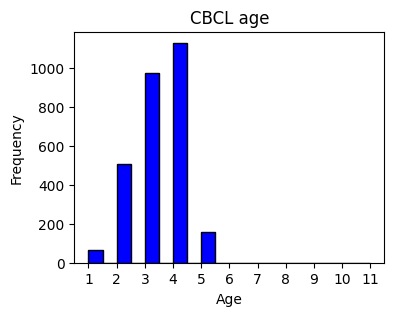

In [27]:
plt.figure(figsize=(4, 3)) 
plt.hist(cbcl['age_at_eval_years'], bins=20, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('CBCL age')
plt.xticks(range(min(cbcl['age_at_eval_years']), max(cbcl['age_at_eval_years']) + 1, 1))

# Show the plot
plt.show()

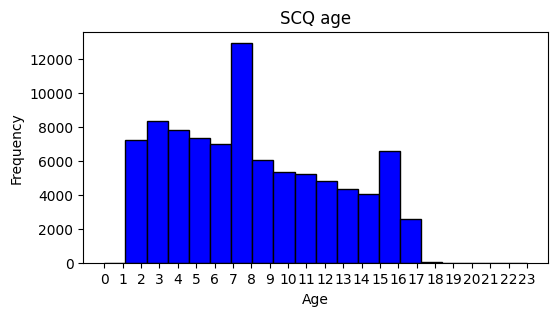

In [32]:
plt.figure(figsize=(6, 3)) 
plt.hist(scq['age_at_eval_years'], bins=20, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('SCQ age')
plt.xticks(range(min(scq['age_at_eval_years']), max(scq['age_at_eval_years']) + 1, 1))

# Show the plot
plt.show()

In [34]:
dcdq = pd.read_csv("dcdq-2023-07-21.csv")

/tmp/ipykernel_1439137/1416806576.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  dcdq = pd.read_csv("dcdq-2023-07-21.csv")


In [38]:
vineland = pd.read_csv("vineland-3-2023-07-21.csv")
rbsr = pd.read_csv("rbsr-2023-07-21.csv")

In [39]:
# Create a DataFrame with counts and normalized percentages
dcdq_asd = pd.DataFrame({
    'Counts': dcdq['asd'].value_counts(),
    'Percentages': dcdq['asd'].value_counts(normalize=True) * 100
})

# Display the table
print("DCDQ - ASD count")
print(dcdq_asd)

DCDQ - ASD count
      Counts  Percentages
asd                      
True   35097        100.0


In [40]:
# Create a DataFrame with counts and normalized percentages
rbsr_asd = pd.DataFrame({
    'Counts': rbsr['asd'].value_counts(),
    'Percentages': rbsr['asd'].value_counts(normalize=True) * 100
})

# Display the table
print("RBSR - ASD count")
print(rbsr_asd)

RBSR - ASD count
      Counts  Percentages
asd                      
True   46517        100.0


In [42]:
# Create a DataFrame with counts and normalized percentages
vineland_asd = pd.DataFrame({
    'Counts': vineland['asd'].value_counts(),
    'Percentages': vineland['asd'].value_counts(normalize=True) * 100
})

# Display the table
print("Vineland3 - ASD count")
print(vineland_asd)

Vineland3 - ASD count
       Counts  Percentages
asd                       
True    23159    99.995682
False       1     0.004318


In [ ]:
dcdq = pd.read_csv("dcdq-2023-07-21.csv")
vineland = pd.read_csv("vineland-3-2023-07-21.csv")
rbsr = pd.read_csv("rbsr-2023-07-21.csv")

# Basic medical screening

In [90]:
basic = pd.read_csv("basic_medical_screening-2023-07-21.csv")

In [91]:
# overlaps with CBCL data



In [47]:
cbcl.shape

(2835, 175)

In [48]:
basic.shape

(192557, 133)

In [49]:
cbcl_basic.shape

(2799, 307)

### BMS and SCQ

In [112]:
filtered = cbcl_basic[cbcl_basic['age_at_eval_months_x'] < 72]

#cbcl_basic.columns

In [114]:
cbcl_basic = pd.merge(cbcl, basic, on="subject_sp_id", how="inner")
scq_basic = pd.merge(scq, basic, on="subject_sp_id", how="inner")
vineland_basic = pd.merge(vineland, basic, on="subject_sp_id", how="inner")
dcdq_basic = pd.merge(dcdq, basic, on="subject_sp_id", how="inner")
rbsr_basic = pd.merge(rbsr, basic, on="subject_sp_id", how="inner")

frames = ['cbcl_basic','scq_basic','dcdq_basic','vineland_basic','rbsr_basic']
parameters = ['behav_adhd','behav_conduct','behav_odd','behav_intermitt_explos','mood_anx','mood_bipol','mood_dep','mood_ocd']


for frame in frames:
    # Assuming your dataframes are stored as df_cbcl_basic, df_scq_basic, etc.
    df = globals()[f'{frame}']  # Dynamically access the dataframe
    
    # Iterate over each parameter in the dataframe
    for parameter in parameters:
        # Fill NaN values with 0 for the specified parameter
        df[parameter] = df[parameter].fillna(value=0)


for df_name in frames:
    df = eval(df_name)
    temp = df[df['age_at_eval_months_x']<72]   # filter by age
    
    print("\n\n-----------", df_name, "----------------\n")
    for parameter in parameters:
        table = pd.DataFrame({
        'Counts' : temp[parameter].value_counts(),
        'Percentages': temp[parameter].value_counts(normalize=True) * 100
        })
        
        print("\n")
        print(table)
        



----------- cbcl_basic ----------------



            Counts  Percentages
behav_adhd                     
0.0           2620    93.638313
1.0            178     6.361687


               Counts  Percentages
behav_conduct                     
0.0              2778    99.285204
1.0                20     0.714796


           Counts  Percentages
behav_odd                     
0.0          2769    98.963545
1.0            29     1.036455


                        Counts  Percentages
behav_intermitt_explos                     
0.0                       2790    99.714081
1.0                          8     0.285919


          Counts  Percentages
mood_anx                     
0.0         2747    98.177269
1.0           51     1.822731


            Counts  Percentages
mood_bipol                     
0.0           2792    99.785561
1.0              6     0.214439


          Counts  Percentages
mood_dep                     
0.0         2792    99.785561
1.0            6     0.214439


     

cbcl_basic
|                | Value | Counts | Percentages |
|----------------|-------|--------|-------------|
| **behav_adhd** | 0.0   | 2620   | 93.60       |
|                | 1.0   | 179    | 6.40        |
| **behav_conduct** | 0.0 | 2779   | 99.29       |
|                   | 1.0 | 20     | 0.71        |
| **behav_odd**    | 0.0   | 2769   | 98.93       |
|                | 1.0   | 30     | 1.07        |
| **behav_intermitt_explos** | 0.0 | 2791 | 99.71 |
|                           | 1.0 | 8     | 0.29        |
| **mood_anx**     | 0.0   | 2748   | 98.18       |
|                | 1.0   | 51     | 1.82        |
| **mood_bipol**   | 0.0   | 2793   | 99.79       |
|                | 1.0   | 6      | 0.21        |
| **mood_dep**     | 0.0   | 2793   | 99.79       |
|                | 1.0   | 6      | 0.21        |
| **mood_ocd**     | 0.0   | 2769   | 98.93       |
|                | 1.0   | 30     | 1.07        |


scq_basic
|                | Value | Counts | Percentages |
|----------------|-------|--------|-------------|
| **behav_adhd** | 0.0   | 61855  | 69.85       |
|                | 1.0   | 26704  | 30.15       |
| **behav_conduct** | 0.0 | 87192  | 98.46       |
|                   | 1.0 | 1367   | 1.54        |
| **behav_odd**    | 0.0   | 83126  | 93.87       |
|                | 1.0   | 5433   | 6.13        |
| **behav_intermitt_explos** | 0.0 | 87308 | 98.59 |
|                           | 1.0 | 1251  | 1.41        |
| **mood_anx**     | 0.0   | 74272  | 83.87       |
|                | 1.0   | 14287  | 16.13       |
| **mood_bipol**   | 0.0   | 87325  | 98.61       |
|                | 1.0   | 1234   | 1.39        |
| **mood_dep**     | 0.0   | 83045  | 93.77       |
|                | 1.0   | 5514   | 6.23        |
| **mood_ocd**     | 0.0   | 83555  | 94.35       |
|                | 1.0   | 5004   | 5.65        |


dcdq_basic 
|                | Value | Counts | Percentages |
|----------------|-------|--------|-------------|
| **behav_adhd** | 0.0   | 20840  | 60.15       |
|                | 1.0   | 13809  | 39.85       |
| **behav_conduct** | 0.0 | 33951  | 97.99       |
|                   | 1.0 | 698    | 2.01        |
| **behav_odd**    | 0.0   | 31760  | 91.66       |
|                | 1.0   | 2889   | 8.34        |
| **behav_intermitt_explos** | 0.0 | 34031 | 98.22 |
|                           | 1.0 | 618    | 1.78        |
| **mood_anx**     | 0.0   | 27497  | 79.36       |
|                | 1.0   | 7152   | 20.64       |
| **mood_bipol**   | 0.0   | 34101  | 98.42       |
|                | 1.0   | 548    | 1.58        |
| **mood_dep**     | 0.0   | 32284  | 93.17       |
|                | 1.0   | 2365   | 6.83        |
| **mood_ocd**     | 0.0   | 31996  | 92.34       |
|                | 1.0   | 2653   | 7.66        |


vineland_basic
|                | Value | Counts | Percentages |
|----------------|-------|--------|-------------|
| **behav_adhd** | 0.0   | 14366  | 62.98       |
|                | 1.0   | 8443   | 37.02       |
| **behav_conduct** | 0.0 | 22389  | 98.16       |
|                   | 1.0 | 420    | 1.84        |
| **behav_odd**    | 0.0   | 21037  | 92.23       |
|                | 1.0   | 1772   | 7.77        |
| **behav_intermitt_explos** | 0.0 | 22401 | 98.21 |
|                           | 1.0 | 408    | 1.79        |
| **mood_anx**     | 0.0   | 17942  | 78.66       |
|                | 1.0   | 4867   | 21.34       |
| **mood_bipol**   | 0.0   | 22357  | 98.02       |
|                | 1.0   | 452    | 1.98        |
| **mood_dep**     | 0.0   | 20977  | 91.97       |
|                | 1.0   | 1832   | 8.03        |
| **mood_ocd**     | 0.0   | 20922  | 91.73       |
|                | 1.0   | 1887   | 8.27        |


rbsr_basic
|                | Value | Counts | Percentages |
|----------------|-------|--------|-------------|
| **behav_adhd** | 0.0   | 28657  | 62.51       |
|                | 1.0   | 17187  | 37.49       |
| **behav_conduct** | 0.0 | 44912  | 97.97       |
|                   | 1.0 | 932    | 2.03        |
| **behav_odd**    | 0.0   | 42192  | 92.03       |
|                | 1.0   | 3652   | 7.97        |
| **behav_intermitt_explos** | 0.0 | 44948 | 98.05 |
|                           | 1.0 | 896    | 1.95        |
| **mood_anx**     | 0.0   | 36098  | 78.74       |
|                | 1.0   | 9746   | 21.26       |
| **mood_bipol**   | 0.0   | 44818  | 97.76       |
|                | 1.0   | 1026   | 2.24        |
| **mood_dep**     | 0.0   | 42034  | 91.69       |
|                | 1.0   | 3810   | 8.31        |
| **mood_ocd**     | 0.0   | 41733  | 91.03       |
|                | 1.0   | 4111   | 8.97        |


In [104]:
cbcl['age_at_eval_years'].dtype

dtype('int64')